In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import plotly.io as pio
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input,Output

In [2]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [3]:
os.getcwd()

'C:\\Users\\Sriram\\eds_covid-19\\notebooks'

In [4]:
#Reading stored data
df_for_plot=pd.read_csv('../data/processed/COVID_JH_data_small_flat_table.csv',sep=';')
df_for_plot.sort_values('date',ascending=False).head()

,date,Germany,United Kingdom,India,US
214,2020-08-23,234494,327643,3106348,5701679
213,2020-08-22,233861,326595,3044940,5667112
212,2020-08-21,233029,325263,2975701,5622540
211,2020-08-20,231292,324203,2905825,5573847
210,2020-08-19,229706,323008,2836925,5529824


C:\Users\Sriram\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 1152x648 with 0 Axes>

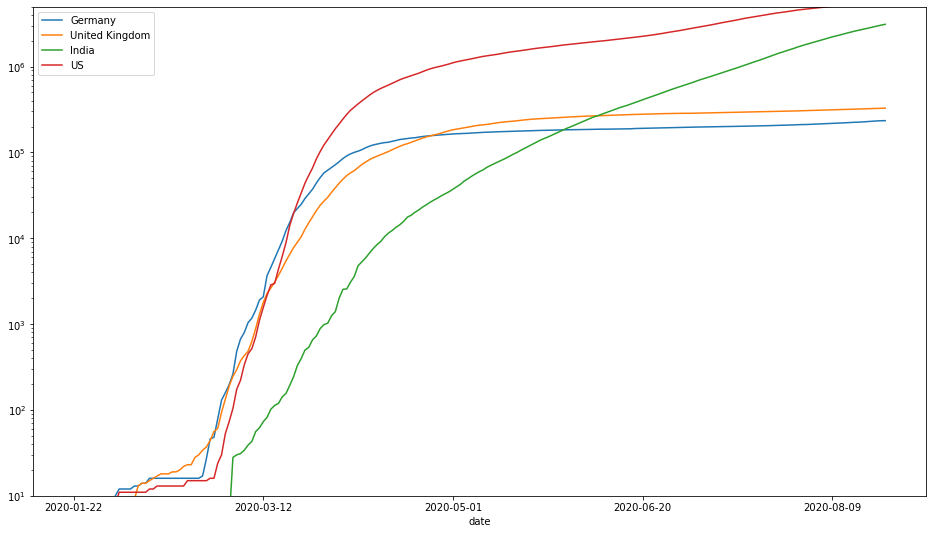

In [5]:
plt.figure()
ax=df_for_plot.set_index('date').plot()
plt.ylim(10,5000000)
ax.set_yscale('log')

# Dynamic Plots

In [6]:
fig=go.Figure()

In [7]:

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [8]:
country_list=['Germany', 'United Kingdom','India','US']
for country in country_list:
    fig.add_trace(go.Scatter(x=df_for_plot.date,
                            y=df_for_plot[country],
                            mode='lines+markers',
                            name=country))
fig.update_layout(xaxis_title='Time',
                yaxis_title='Confirmed cases[JH Data]',
                width=1400,
                height=800)
fig.update_yaxes(type="log")
fig.update_layout(xaxis_rangeslider_visible=True)
# can also render in browser
fig.show(renderer='browser')

In [9]:
app=dash.Dash()
app.layout=html.Div([
    html.Label('Multi-Select Country'),
    dcc.Dropdown(id='country_drop_down',
    options=[
        {'label':'Germany', 'value':'Germany'},
        {'label':'India', 'value':'India'},
        {'label':'United Kingdom', 'value':'United Kingdom'},
        {'label':'US', 'value':'US'}
            ],
    value=['India','Germany'],
    multi=True
                ),
    dcc.Graph(figure=fig, id='main_window_slope')
                    ])

In [10]:
@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down','value')])
def update_figure(country_list):
    traces=[]
    #pushing the dataset to the list
    for country in country_list:
        traces.append(dict(x=df_for_plot.date,
                          y=df_for_plot[country],
                          mode='lines+markers',
                          name=country
                          )
                     )
    design=dict(xaxis_title='Time',
                yaxis_title='Confirmed cases[JH Data, log scale]',
                width=1500,
                height=750,
                yaxis={'type':'log'})
    return{ 'data':traces,
          'layout':design}

In [12]:
app.run_server(debug=True,use_reloader=False)

Running on http://127.0.0.1:8050/
Debugger PIN: 930-511-937
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
